**importing libraries**

In [1]:
#libraries for data manipulation
import pandas as pd
import numpy as np

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#library for scaling data
from sklearn.preprocessing import StandardScaler

#library for splitting data into train and test
from sklearn.model_selection import train_test_split

#library for logistic regression
from sklearn.linear_model import LogisticRegression

#library for confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#importing dataset
df = pd.read_csv('Data\HR_comma_sep.csv')

**Data Exploration, Data Cleaning and Preparation**

In [3]:
#seeing the no. of rows and columns
print(df.shape)

(14999, 10)


we have 14999 observations and 10 features in our dataset.

In [4]:
#checking the info of dataset 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [5]:
# Checking Statistical Features
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
#Checking the null values in dataset
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


There are no missing values in the dataset.

In [7]:
#checking columns names
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


There are no extra spaces in the column names therefore we can proceed further.

**Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e., whether they leave the company or continue to work)**

In [8]:
#checking the variable names in dataset
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

It tell us,this dataset contains following variables/attributes: 
1.  Satisfactory Level
2.  last evaluation
3.  Number of Project
4.  Average Monthly Hours
5.  Time Spend Company
6.  Work accident
7.  left
8.  Promotion Last 5 Years
9.  Department
10. Salary

Except 'left' all are independent variable/attributes and 'left' is dependent on these.

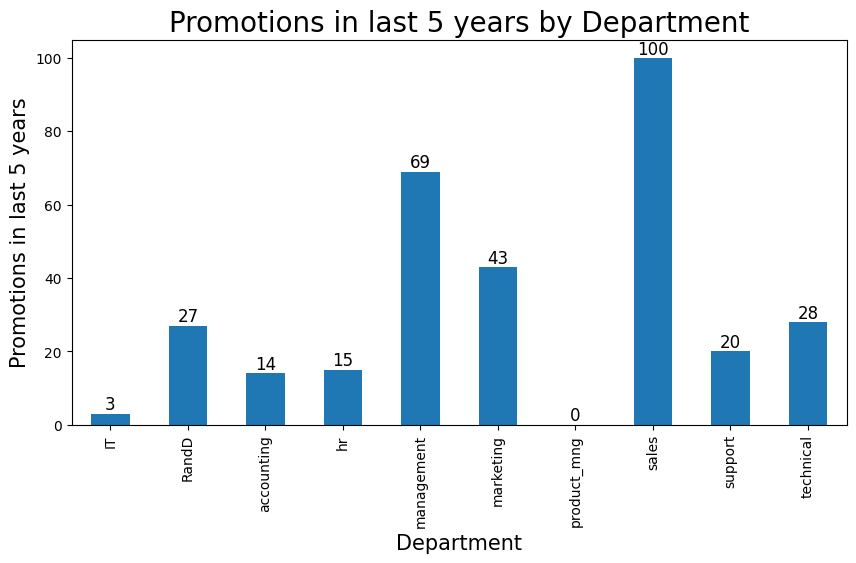

In [9]:
#plot bar chart to see promotions in last 5 years
plt.figure(figsize=(10,5))
ax = df.groupby('Department')['promotion_last_5years'].sum().plot(kind='bar')
plt.ylabel('Promotions in last 5 years', fontsize=15)
plt.xlabel('Department', fontsize=15)
plt.title('Promotions in last 5 years by Department', fontsize=20)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.show()

It can be seen that the maximum number of promotions are in Sales Department.

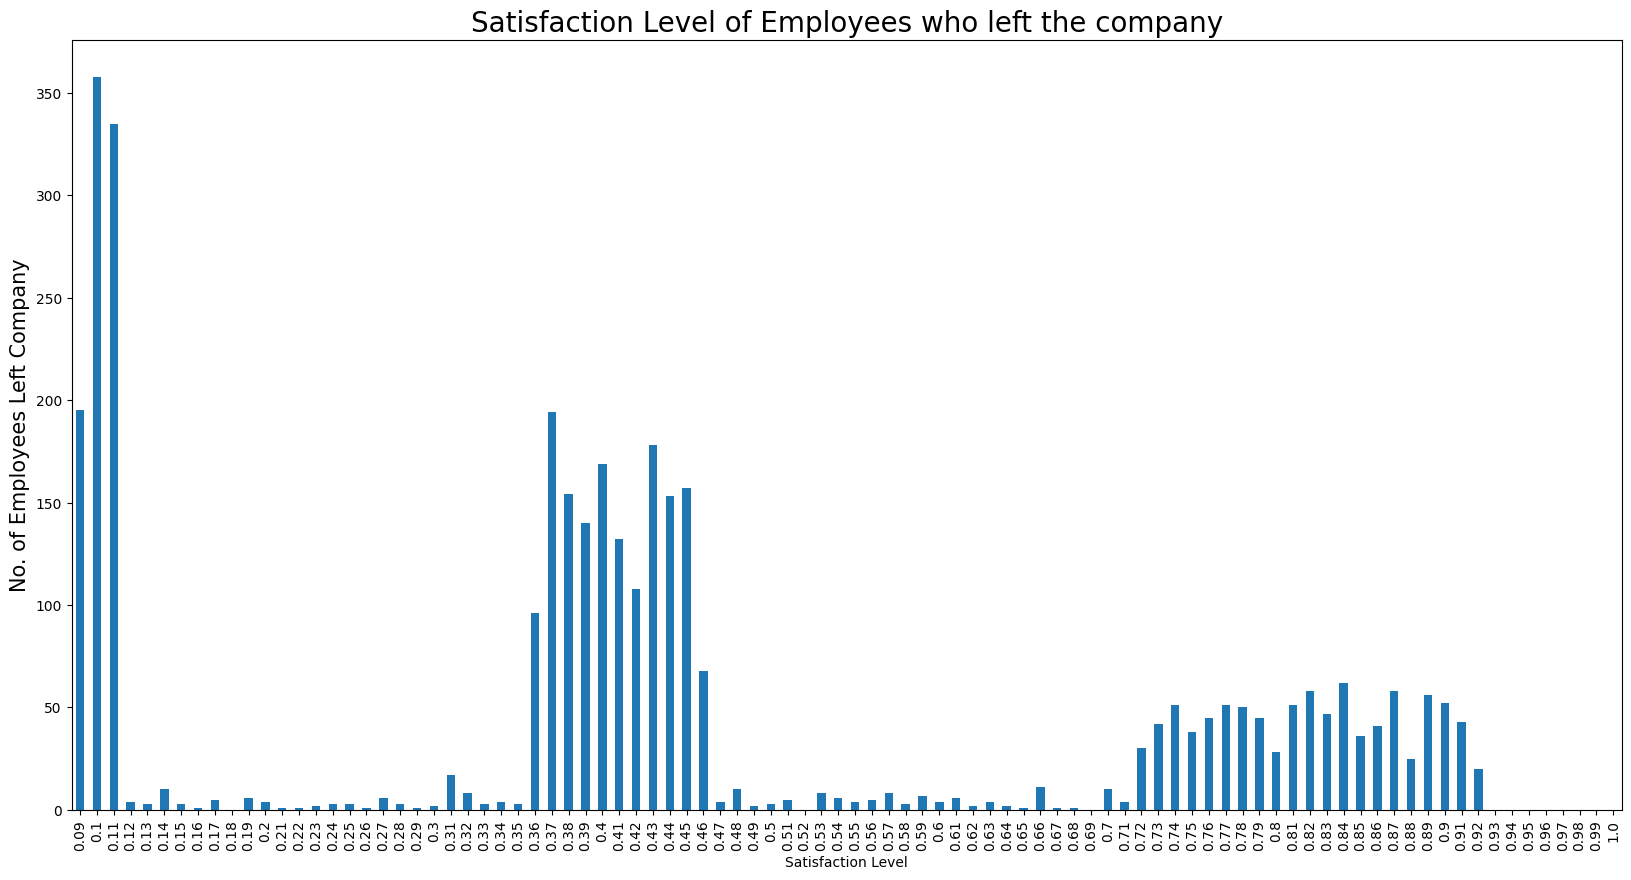

In [10]:
#plot bar chart to see satisfaction level of employees who left the company
plt.figure(figsize=(20,10))
df.groupby('satisfaction_level')['left'].sum().plot(kind='bar')
plt.ylabel('No. of Employees Left Company',fontsize=15)
plt.xlabel('Satisfaction Level')
plt.title('Satisfaction Level of Employees who left the company', fontsize=20)
plt.show()

Here we can see that most of the Employee who left job was not satisfied and their satisfaction level was below 50% , but a good proportion of employees whose satisfaction level was between 0.7 to 0.95 also left the job.

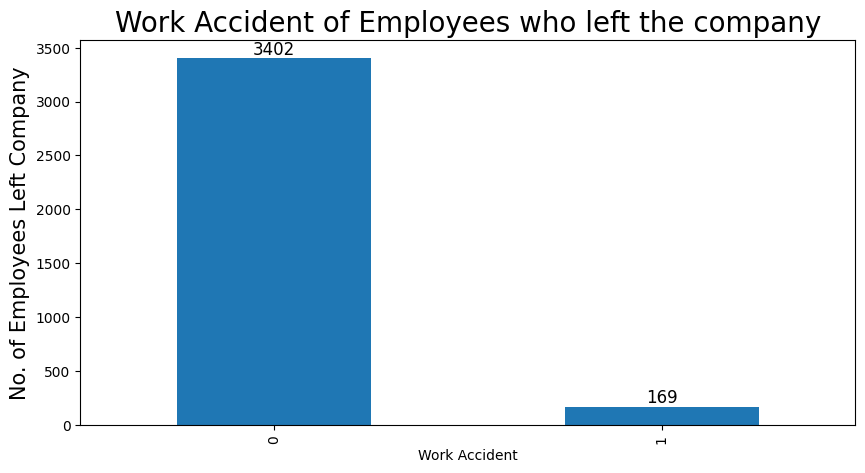

In [11]:
#plot bar chart to see impact of work accidents on employees who left the company
plt.figure(figsize=(10,5))
ax = df.groupby('Work_accident')['left'].sum().plot(kind='bar')
plt.ylabel('No. of Employees Left Company',fontsize=15)
plt.xlabel('Work Accident')
plt.title('Work Accident of Employees who left the company', fontsize=20)
 
# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12) 
plt.show()

As we can see that work accident is not a major feature which determines Employee Retention as we can see people who have not faced any work accident also left the job.

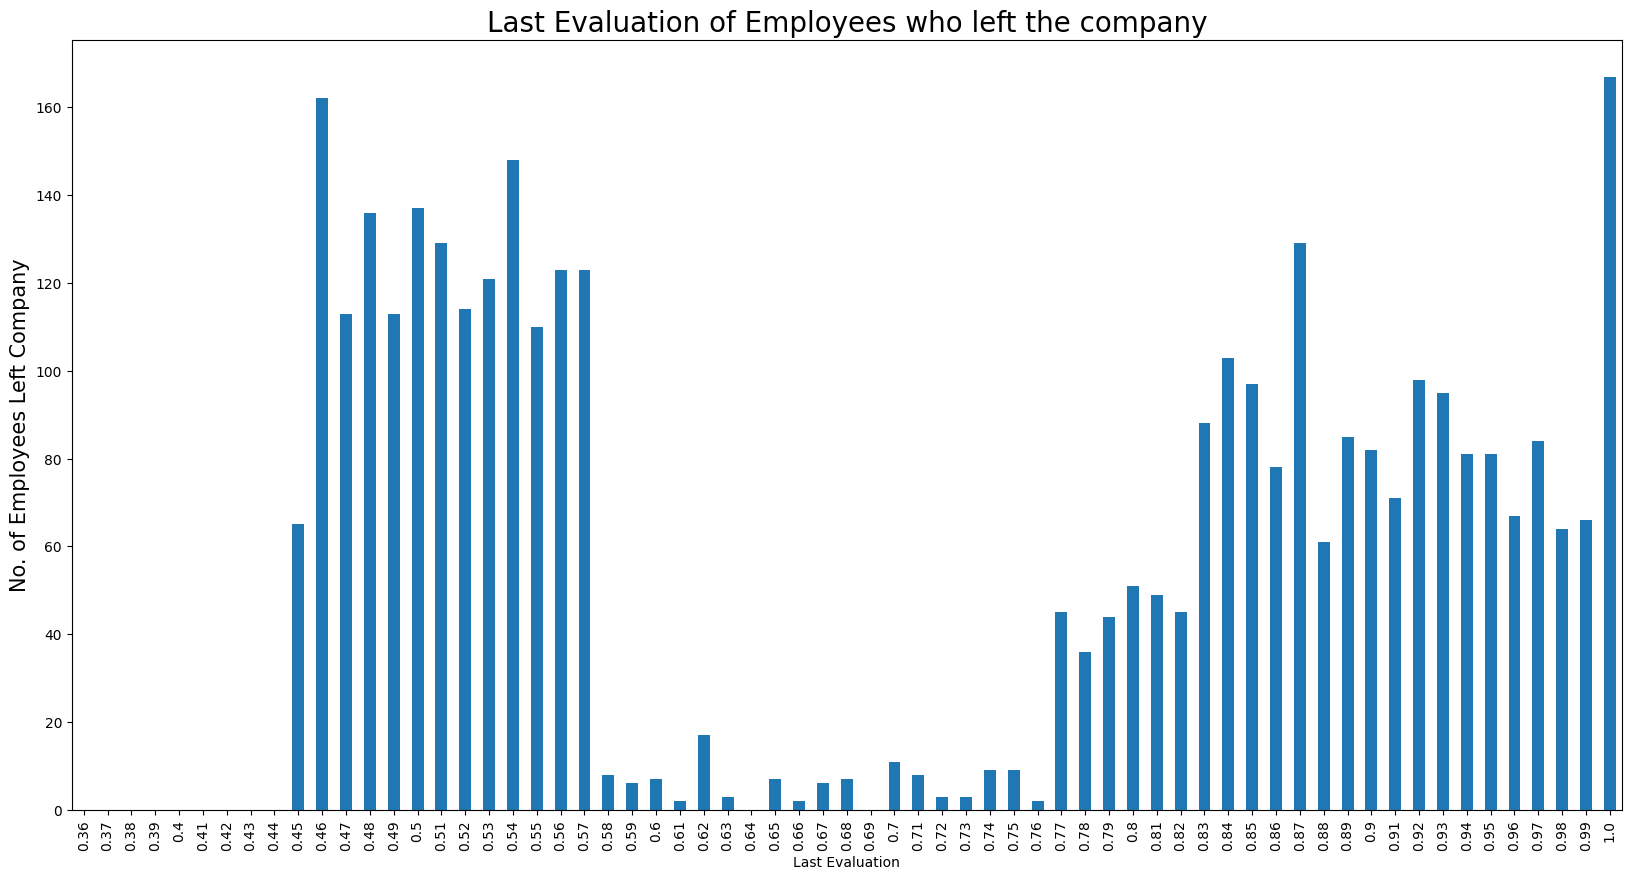

In [12]:
#plot bar chart to see impact of last evaluation on employees who left the company
plt.figure(figsize=(20,10))
df.groupby('last_evaluation')['left'].sum().plot(kind='bar')
plt.ylabel('No. of Employees Left Company',fontsize=15)
plt.xlabel('Last Evaluation')
plt.title('Last Evaluation of Employees who left the company', fontsize=20)
plt.show()

last evaluation is also not a major feature which determines Employee Retention as we can see people who have not faced any work accident also left the job.

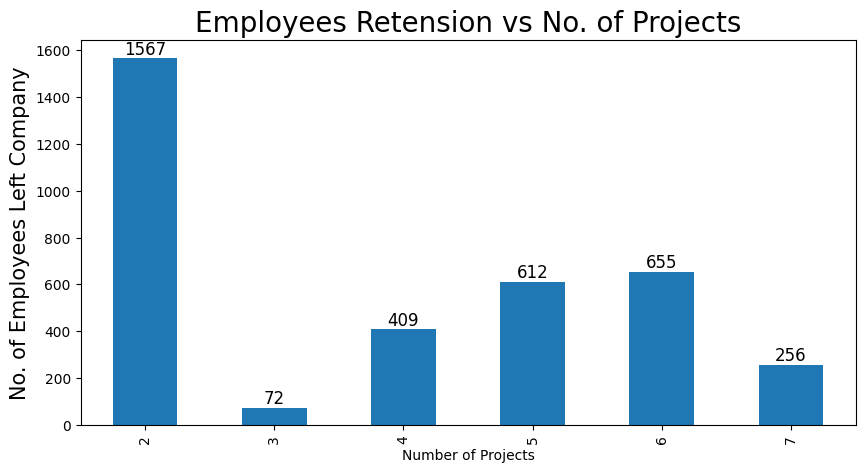

In [13]:
#plot bar chart to see impact of number of projects on employees who left the company
plt.figure(figsize=(10,5))
ax = df.groupby('number_project')['left'].sum().plot(kind='bar')
plt.ylabel('No. of Employees Left Company',fontsize=15)
plt.xlabel('Number of Projects')
plt.title('Employees Retension vs No. of Projects', fontsize=20)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.show()

Most of the people who left the job have done 2 or less than 2 projects.

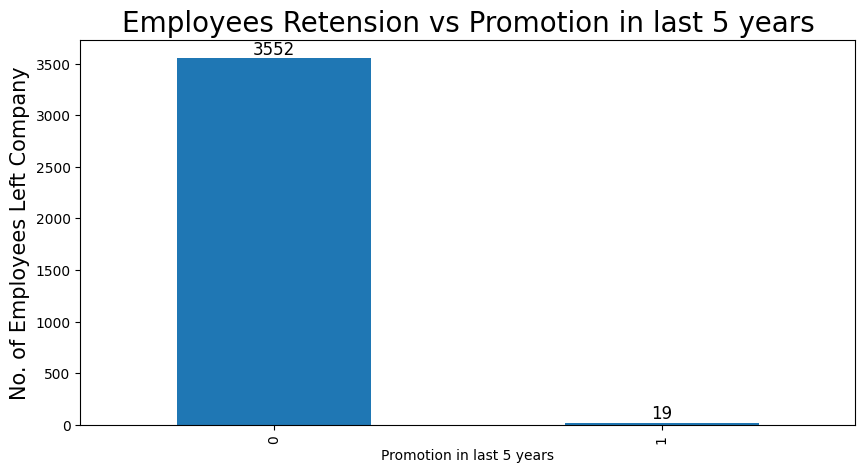

In [14]:
#plot bar chart to see impact of promotion in last 5 years on employees who left the company
plt.figure(figsize=(10,5))
ax = df.groupby('promotion_last_5years')['left'].sum().plot(kind='bar')
plt.ylabel('No. of Employees Left Company',fontsize=15)
plt.xlabel('Promotion in last 5 years')
plt.title('Employees Retension vs Promotion in last 5 years', fontsize=20)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.show()

Its mean that the people who left the job have not got promotion in last 5 years.

**Plot bar charts showing impact of employee salaries on retention**


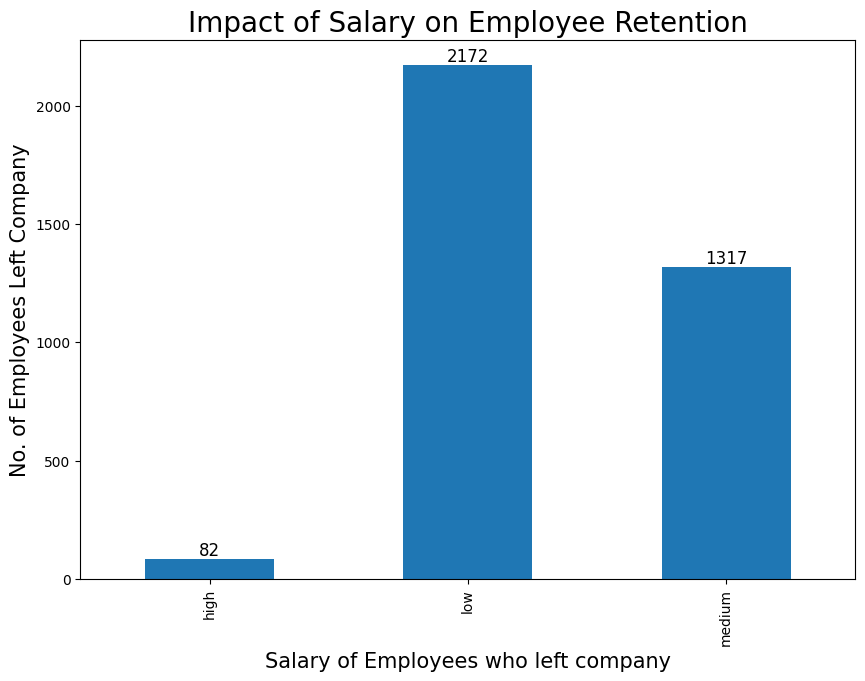

In [15]:
plt.figure(figsize=(10,7))
ax = df.groupby('salary')['left'].sum().plot.bar()
plt.title('Impact of Salary on Employee Retention',fontsize=20)
plt.ylabel('No. of Employees Left Company',fontsize=15)
plt.xlabel('Salary of Employees who left company',fontsize=15)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.show()


It can be clearly seen that most of the employees who left the job were earning low income or medium income and very less proportion of employees are there who left their job and were earning hign income. This implies that Salary is a major factor in determining the Employee Retention

**Plot bar charts showing corelation between department and employee retention**

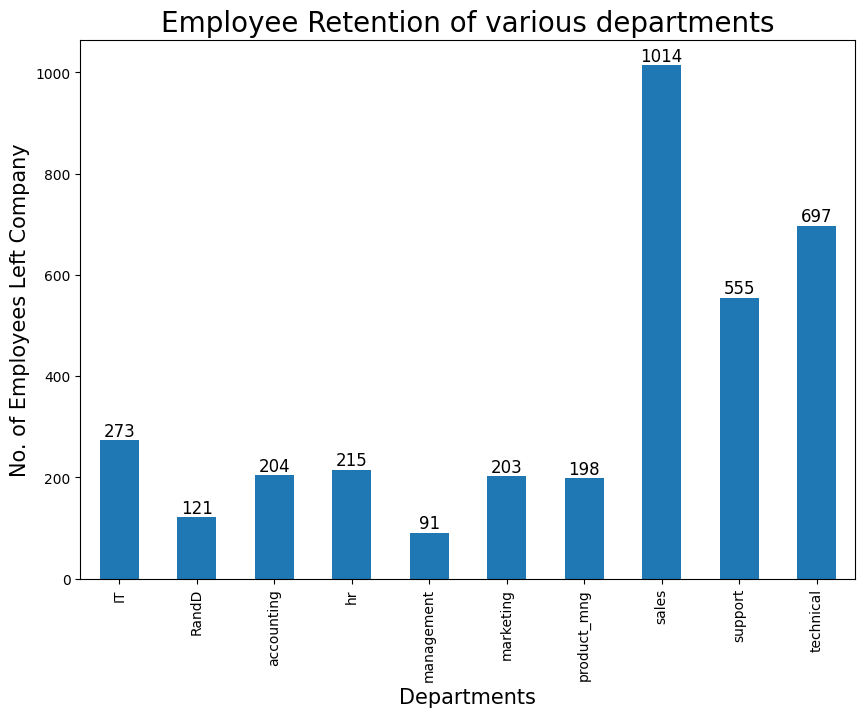

In [16]:
plt.figure(figsize=(10,7))
ax = df.groupby('Department')['left'].sum().plot.bar()
plt.title('Employee Retention of various departments',fontsize=20)
plt.ylabel('No. of Employees Left Company',fontsize=15)
plt.xlabel('Departments',fontsize=15)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.show()


As we can see the sales department employee has less retention although the maximum number of promotions are in Sales Department.

**Cleaning**

In [17]:
#Eliminating the variables which are not required for model building
df.drop(['Work_accident'],axis=1,inplace=True)


In [18]:
#checking the duplicate values in dataset
df.duplicated().sum()

3008

In [19]:
#dropping the duplicates
df.drop_duplicates(inplace=True)

In [20]:
#now checking the duplicate values in dataset
df.duplicated().sum()

0

In [21]:
df1 = pd.get_dummies(df)
#Separating the dependent and independent variables

#In y, we will store the dependent variable
y = df1.pop('left')
#In x, we will store the independent variables
x = df1




In [22]:
df1.shape

(11991, 19)

**logistic regression model**

In [23]:
#Splitting the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [24]:
#Checking sizes of data to know whether they are split correctly or not

#shape of train data
print(X_train.shape)
#shape of test data
print(X_test.shape)

#shape of train target variable
print(y_train.shape)
#shape of test target variable
print(y_test.shape)

(9592, 19)
(2399, 19)
(9592,)
(2399,)


In [25]:
# applying Feature Scaling on our data for better model prediction
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
# applying Logistic Regression on our data
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [27]:
#predicting the test data
y_pred = lr.predict(X_test)

**Measure the accuracy of the model**

In [28]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1920   78]
 [ 333   68]]


This shows that 1988 (i.e. 1920 + 68) predicted values out of 2399 values are same as the actual values, Now let's check accuracy of our model

In [29]:
#checking the accuracy of model
print(accuracy_score(y_test,y_pred))

0.8286786160900376


Therefore our Model can work with an accuracy of 82.87%

**Hence we can use this model for Job Prediction (i.e we can predict whether an Employee will leave a job or not) with an accuracy of 82.87%**